## Classification using Random Forest

In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv("./datasets/bank_data_processed.csv")
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [3]:
X = bank_data.drop('CreditCard',axis=1)
Y = bank_data['CreditCard']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
ran_clf = RandomForestClassifier(n_estimators = 400,max_leaf_nodes = 16,n_jobs=-1)

In [9]:
ran_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [10]:
y_pred = ran_clf.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [12]:
important_features = pd.Series(ran_clf.feature_importances_,index=X.columns).sort_values(ascending=False)

In [13]:
important_features

CD Account            0.395733
Income                0.148553
Age                   0.135283
Securities Account    0.084308
Mortgage              0.083907
Online                0.077221
Family                0.043821
Education             0.031174
dtype: float64

It seems that CD account feature is the best feature that decides the classification

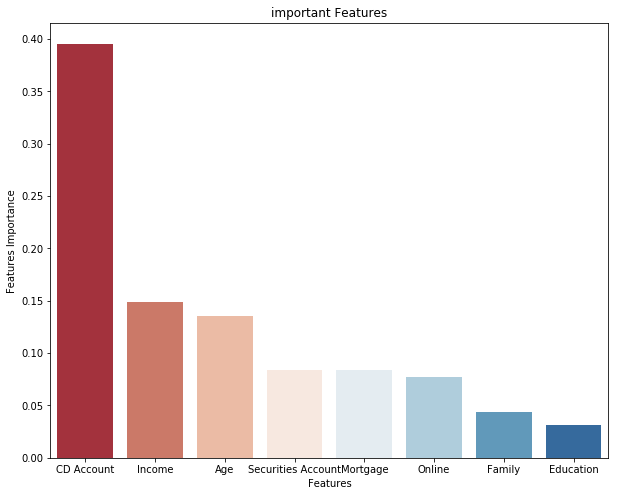

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=important_features.index,y = important_features,palette='RdBu')

plt.xlabel("Features")
plt.ylabel("Features Importance")

plt.title("important Features")
plt.show()